# Natural Language Processing Project

**Objective:** In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## The Data

In [2]:
# Read the yelp dataframe and set as yelp
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
#Text length column, the number of words in the text column
yelp["text length"] = yelp["text"].apply(len)

In [7]:
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


# Exploratory Data Analysis

Let's explore the data

First we explore the text length by the different star ratings.

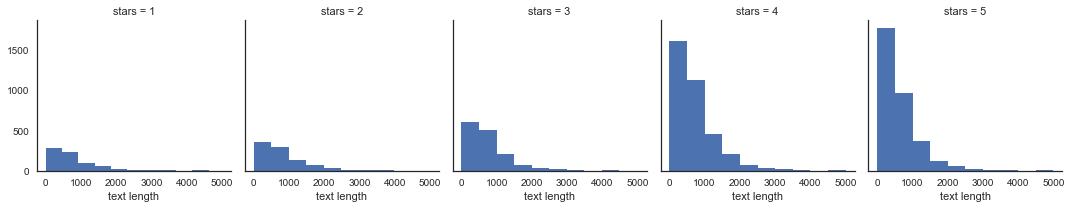

In [8]:
sb.set_style('white')
g = sb.FacetGrid(yelp,col='stars')
g = g.map(plt.hist,"text length")

For 4 and 5 stars have more reviews between 0 to 1000 text lengths than 1 star reviews. Those who enjoyed their service would be generous to leave a rating and review than those who didn't like their service.

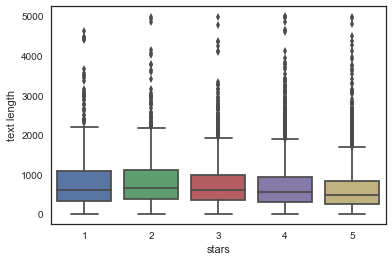

In [9]:
#Boxplot of text length for each star category
sb.set_style('white')
sb.boxplot(x='stars',y='text length',data=yelp)

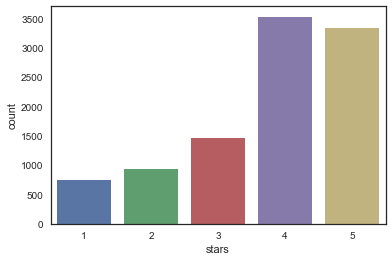

In [10]:
#Countplot of the frequency of each star rating type
sb.countplot(x='stars',data=yelp)

4 and 5 star reviews are more frequent than 1,2,3 star reviews.

Let's use the groupby method on stars to get the mean values of the numerical columns.

In [11]:
#Using groupby and mean method
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Using the corr() method on the groupby dataframe to produce a correlation dataframe:

In [12]:
#Using corr() method
stars_corr = stars.corr()
stars_corr

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


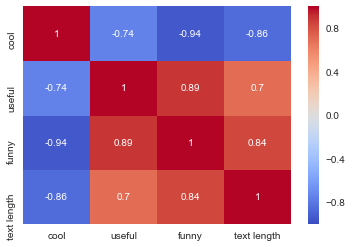

In [13]:
#Seaborn heatmap on the correlation dataframe
sb.heatmap(stars_corr,annot=True,cmap='coolwarm')

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, we grab reviews that were either 1 star or 5 stars.

In [14]:
#This dataframe contains columns from yelp dataframe but only 1 or 5 star reviews
yelp_class = yelp[(yelp.stars == 1) | (yelp.stars == 5)]
#yelp_class.head()

In [15]:
#Feature and tabel labels
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
#Import CountVectorizer and object
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
#fit_transform method on CountVectorizer object,pass in X, overwrite X
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

In [18]:
#Import train_test_split to split data set, test size set as 0.30. random state at 101
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

Time to train a model. We will be using the Naive Bayes model for this.

In [20]:
#Import Multinomail Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()

In [21]:
#fit nb to training data
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did.

In [22]:
#Use predict method on nb and X_test
pred = nb.predict(X_test)

Now to create a confusion matrix and classification report using these predictions and y_test.

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(pred,y_test))
print('\n')
print(classification_report(pred,y_test))

[[159  22]
 [ 69 976]]


             precision    recall  f1-score   support

          1       0.70      0.88      0.78       181
          5       0.98      0.93      0.96      1045

avg / total       0.94      0.93      0.93      1226



Let's see what happens if we try to include TF-IDF to this process using a pipeline.

# Using Text Processing

In [25]:
#Import the TfidfTransformer from sklearn
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
#Import Pipeline for sklearn
from sklearn.pipeline import Pipeline

In [27]:
#Create a pipeline with the CountVectorizer, TfidfTransformer, and MultinomialNB
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('nb',MultinomialNB())
])

## Using the Pipeline

Time to use the pipeline! Pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data. Remember that we overwrote X as the CountVectorized version. What we need is just the text

### Train Test Split

In [28]:
#Redo train/test split on the yelp_class object
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Now to fit the pipeline to the training data. We can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels

In [29]:
#This will take time to fit
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...linear_tf=False, use_idf=True)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

Now use the pipeline to predict from the X_test and create a classification report and confusion matrix.

In [30]:
#predict method onto pipeline
pred_pl = pipeline.predict(X_test)

In [31]:
print(confusion_matrix(pred_pl,y_test))
print('\n')
print(classification_report(pred_pl,y_test))

[[  0   0]
 [228 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          5       1.00      0.81      0.90      1226

avg / total       1.00      0.81      0.90      1226



C:\Users\Ban\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


For some reason, including the TF-IDF predicted all 5 star reviews! Other things worth exploring would be a different classifier algorithm to the MultinomialNB to see another set of results.

In [34]:
from sklearn.metrics import accuracy_score

In [37]:
#Accuracy scores of predictions via pipeline, and without tfidf transformer
print('With TF-IDF: ', accuracy_score(y_test,pred_pl)) #0.8140
print('\n')
print('Without TF-IDF', accuracy_score(y_test,pred)) #0.9257

With TF-IDF:  0.814029363785


Without TF-IDF 0.925774877651
